## Justin Sandbox

In [1]:
# Import linraries and modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sqlite3 
import calendar


In [2]:
conn = sqlite3.connect('../data/im.db')

In [3]:
pd.read_sql("""
SELECT *
  FROM movie_ratings;
""", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
df_dirs = pd.read_sql("""
 SELECT *
    FROM 
    movie_basics AS mb
        LEFT JOIN
            (SELECT *
            FROM directors GROUP BY movie_id) AS dr
            ON mb.movie_id = dr.movie_id
""", conn)

In [5]:
df_imdb = pd.read_sql("""
    SELECT *
    FROM 
    movie_basics AS mb
        LEFT JOIN movie_ratings AS mr
            ON mb.movie_id = mr.movie_id
        LEFT JOIN
            (SELECT *
            FROM directors GROUP BY movie_id) AS dr
            ON mb.movie_id = dr.movie_id
        LEFT JOIN persons AS ps
            ON dr.person_id = ps.person_id
""", conn)

In [6]:
df_dirs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   movie_id         140417 non-null  object 
 7   person_id        140417 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 8.9+ MB


In [7]:
df_dirs.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,nm0712540
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,nm0002411
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,nm0000080
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,nm0611531
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,nm0765384


In [8]:
df_imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,tt0066787,nm0002411,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0,tt0069049,nm0000080,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0,tt0069204,nm0611531,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0,tt0100275,nm0765384,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,None,NaN,NaN,tt9916538,nm8185151,nm8185151,Azhar Kinoi Lubis,NaN,NaN,director
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,None,NaN,NaN,tt9916622,nm9272490,nm9272490,Angela Gurgel,NaN,NaN,"director,writer"
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,None,NaN,NaN,tt9916706,nm7764440,nm7764440,Kanchan Nayak,NaN,NaN,director
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,None,NaN,NaN,tt9916730,nm10538612,nm10538612,Kiran Gawade,NaN,NaN,None


In [9]:
df_imdb[df_imdb['primary_title'].str.contains("Avatar")].sort_values('primary_title')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession
20368,tt1854506,Aliens vs. Avatars,Aliens vs. Avatars,2011,80.0,"Horror,Sci-Fi",tt1854506,1.6,1544.0,tt1854506,nm0006955,nm0006955,Lewis Schoenbrun,NaN,NaN,"editor,editorial_department,miscellaneous"
17060,tt1775309,Avatar,Abatâ,2011,93.0,Horror,tt1775309,6.1,43.0,tt1775309,nm3786927,nm3786927,Atsushi Wada,NaN,NaN,director
11392,tt1630029,Avatar 2,Avatar 2,2021,NaN,"Action,Adventure,Fantasy",None,NaN,NaN,tt1630029,nm0000116,nm0000116,James Cameron,1954.0,NaN,"writer,producer,director"
16337,tt1757678,Avatar 3,Avatar 3,2023,NaN,"Action,Adventure,Drama",None,NaN,NaN,tt1757678,nm0000116,nm0000116,James Cameron,1954.0,NaN,"writer,producer,director"
52213,tt3095356,Avatar 4,Avatar 4,2025,NaN,"Action,Adventure,Fantasy",None,NaN,NaN,tt3095356,nm0000116,nm0000116,James Cameron,1954.0,NaN,"writer,producer,director"
96592,tt5637536,Avatar 5,Avatar 5,2027,NaN,"Action,Adventure,Fantasy",None,NaN,NaN,tt5637536,nm0000116,nm0000116,James Cameron,1954.0,NaN,"writer,producer,director"
77990,tt4472992,Avatarachi Goshta,Avatarachi Goshta,2014,118.0,Drama,tt4472992,7.9,21.0,tt4472992,nm2587508,nm2587508,Nitin Dixit,NaN,NaN,"writer,director,actor"
88870,tt5141528,Avataran,Avataran,2016,NaN,Sci-Fi,None,NaN,NaN,tt5141528,nm7678479,nm7678479,Tarunabh Dutta,NaN,NaN,director
68178,tt3879186,Avatarii: Birth of a Fandom,Avatarii: Birth of a Fandom,2014,NaN,Documentary,None,NaN,NaN,tt3879186,nm3864285,nm3864285,C.P.N. Skola,NaN,NaN,"actor,director"
34245,tt2271191,Avatars as Prostitutes,Avatars as Prostitutes,2012,51.0,"Animation,Documentary,Drama",None,NaN,NaN,tt2271191,nm4925338,nm4925338,Piotr Kopik,NaN,NaN,"director,animation_department,editor"


In [10]:
df_imdb['year_str'] = df_imdb['start_year'].astype(str)

In [11]:
df_imdb['mov_yr_key'] = df_imdb['primary_title'] + "-" + df_imdb['year_str']

In [12]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   movie_id            146144 non-null  object 
 1   primary_title       146144 non-null  object 
 2   original_title      146123 non-null  object 
 3   start_year          146144 non-null  int64  
 4   runtime_minutes     114405 non-null  float64
 5   genres              140736 non-null  object 
 6   movie_id            73856 non-null   object 
 7   averagerating       73856 non-null   float64
 8   numvotes            73856 non-null   float64
 9   movie_id            140417 non-null  object 
 10  person_id           140417 non-null  object 
 11  person_id           140416 non-null  object 
 12  primary_name        140416 non-null  object 
 13  birth_year          30609 non-null   float64
 14  death_year          856 non-null     float64
 15  primary_profession  139887 non-nul

In [13]:
df_imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes,birth_year,death_year
count,146144.000000,114405.000000,73856.000000,7.385600e+04,30609.000000,856.000000
mean,2014.621798,86.187247,6.332729,3.523662e+03,1968.353523,2014.358645
std,2.733583,166.360590,1.474978,3.029402e+04,13.153472,7.049441
min,2010.000000,1.000000,1.000000,5.000000e+00,1878.000000,1929.000000
25%,2012.000000,70.000000,5.500000,1.400000e+01,1960.000000,2013.000000
50%,2015.000000,87.000000,6.500000,4.900000e+01,1970.000000,2016.000000
75%,2017.000000,99.000000,7.400000,2.820000e+02,1978.000000,2017.000000
max,2115.000000,51420.000000,10.000000,1.841066e+06,2004.000000,2019.000000


In [14]:
df_imdb.sort_values('runtime_minutes', ascending=False)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession,year_str,mov_yr_key
132389,tt8273150,Logistics,Logistics,2012,51420.0,Documentary,tt8273150,5.0,17.0,tt8273150,nm9769428,nm9769428,Daniel Andersson,NaN,NaN,"director,editor",2012,Logistics-2012
44840,tt2659636,Modern Times Forever,Modern Times Forever,2011,14400.0,Documentary,tt2659636,6.2,69.0,tt2659636,nm5492599,nm5492599,Bjornstjerne Reuter Christiansen,NaN,NaN,director,2011,Modern Times Forever-2011
123467,tt7492094,Nari,Nari,2017,6017.0,Documentary,None,NaN,NaN,tt7492094,nm9335306,nm9335306,Chai Dingari,NaN,NaN,director,2017,Nari-2017
87264,tt5068890,Hunger!,Hunger!,2015,6000.0,"Documentary,Drama",None,NaN,NaN,tt5068890,nm7617940,nm7617940,Luca Pesante,NaN,NaN,director,2015,Hunger!-2015
88717,tt5136218,London EC1,London EC1,2015,5460.0,"Comedy,Drama,Mystery",None,NaN,NaN,tt5136218,nm6660605,nm6660605,Erdogan Gilgil,NaN,NaN,"producer,director,writer",2015,London EC1-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146131,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,NaN,Family,None,NaN,NaN,tt9915790,nm10538030,nm10538030,Sudipa Chatterjee,NaN,NaN,None,2019,Bobbyr Bondhura-2019
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War",None,NaN,NaN,tt9916428,nm0910951,nm0910951,Jixing Wang,NaN,NaN,"director,writer",2019,The Secret of China-2019
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,None,NaN,NaN,tt9916622,nm9272490,nm9272490,Angela Gurgel,NaN,NaN,"director,writer",2015,Rodolpho Teóphilo - O Legado de um Pioneiro-2015
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,None,NaN,NaN,tt9916706,nm7764440,nm7764440,Kanchan Nayak,NaN,NaN,director,2013,Dankyavar Danka-2013


In [15]:
df_imdb.head(50)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession,year_str,mov_yr_key
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77.0,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer",2013,Sunghursh-2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43.0,tt0066787,nm0002411,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor",2019,One Day Before the Rainy Season-2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517.0,tt0069049,nm0000080,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer",2018,The Other Side of the Wind-2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13.0,tt0069204,nm0611531,nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer",2018,Sabse Bada Sukh-2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119.0,tt0100275,nm0765384,nm0765384,Valeria Sarmiento,1948.0,NaN,"editor,director,writer",2017,The Wandering Soap Opera-2017
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,None,NaN,NaN,tt0111414,nm0398271,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer",2018,A Thin Life-2018
6,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",tt0112502,4.1,32.0,tt0112502,nm6883878,nm6883878,Mc Jones,NaN,NaN,"actor,director",2017,Bigfoot-2017
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",tt0137204,8.1,263.0,tt0137204,nm0365480,nm0365480,Anthony Harrison,1961.0,NaN,"actor,writer,producer",2017,Joe Finds Grace-2017
8,tt0139613,O Silêncio,O Silêncio,2012,NaN,"Documentary,History",None,NaN,NaN,tt0139613,nm0518037,nm0518037,António Loja Neves,1953.0,2018.0,"actor,director,producer",2012,O Silêncio-2012
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,None,NaN,NaN,tt0144449,nm0309428,nm0309428,Louis van Gasteren,1922.0,2016.0,"director,writer,producer",2012,Nema aviona za Zagreb-2012


In [16]:
df_imdb[['Genre_1','Genre_2', 'Genre_3']]=df_imdb["genres"].str.split(",",expand=True)

In [17]:
df_imdb['rating_relative_to_avg'] = df_imdb['averagerating'] - df_imdb['averagerating'].mean()

In [18]:
df_imdb.sort_values('primary_title')[12000:12050]

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,...,primary_name,birth_year,death_year,primary_profession,year_str,mov_yr_key,Genre_1,Genre_2,Genre_3,rating_relative_to_avg
39988,tt2422968,"Ascent: Women, Science and Change","Ascent: Women, Science and Change",2013,83.0,"Biography,Documentary",None,NaN,NaN,tt2422968,...,Ilo Orleans,NaN,NaN,"producer,actor,director",2013,"Ascent: Women, Science and Change-2013",Biography,Documentary,None,NaN
111658,tt6531196,Ascharyachakit!,Ascharyachakit!,2018,90.0,"Drama,Romance",tt6531196,5.0,342.0,tt6531196,...,Samit Kakkad,NaN,NaN,"director,producer,assistant_director",2018,Ascharyachakit!-2018,Drama,Romance,None,-1.332729
56975,tt3324868,Aschenbrödel und der gestiefelte Kater,Aschenbrödel und der gestiefelte Kater,2013,60.0,"Family,Fantasy",tt3324868,5.6,5.0,tt3324868,...,Torsten Künstler,1969.0,NaN,"assistant_director,stunts,production_manager",2013,Aschenbrödel und der gestiefelte Kater-2013,Family,Fantasy,None,-0.732729
129559,tt7994188,Aschhe Abar Shabor,Aschhe Abar Shabor,2018,128.0,"Crime,Drama,Thriller",tt7994188,6.2,345.0,tt7994188,...,Arindam Sil,1964.0,NaN,"actor,director,producer",2018,Aschhe Abar Shabor-2018,Crime,Drama,Thriller,-0.132729
71272,tt4074400,Asco,Asco,2015,70.0,Drama,tt4074400,8.1,19.0,tt4074400,...,Ale Paschoalini,1983.0,NaN,"director,producer,writer",2015,Asco-2015,Drama,None,None,1.767271
10855,tt1612239,Ascot Alley,Ascot Alley,2010,78.0,"Drama,Mystery,Thriller",None,NaN,NaN,tt1612239,...,Nathan Robert Blackburn,1985.0,NaN,"director,writer,editor",2010,Ascot Alley-2010,Drama,Mystery,Thriller,NaN
108546,tt6373528,Asebamu binyû tsuma otto ni somuita hirusagari,Asebamu binyû tsuma otto ni somuita hirusagari,2016,NaN,None,None,NaN,NaN,tt6373528,...,Hideo Jôjô,1975.0,NaN,"assistant_director,director,writer",2016,Asebamu binyû tsuma otto ni somuita hirusagari...,None,None,None,NaN
127085,tt7775542,Aseel,Aseel,2012,78.0,Drama,None,NaN,NaN,tt7775542,...,Khalid Abdulrahim Al-Zadjali,NaN,NaN,"director,writer",2012,Aseel-2012,Drama,None,None,NaN
135865,tt8634328,Asees,Asees,2018,127.0,Drama,tt8634328,7.4,125.0,tt8634328,...,Rana Ranbir,NaN,NaN,"actor,writer,music_department",2018,Asees-2018,Drama,None,None,1.067271
128291,tt7886740,Asehi Ekada Vhave,Asehi Ekada Vhave,2018,119.0,Drama,tt7886740,6.7,23.0,tt7886740,...,Sushrut Bhagwat,NaN,NaN,"director,writer",2018,Asehi Ekada Vhave-2018,Drama,None,None,0.367271


In [19]:
df_gen_cnt = df_imdb[['Genre_1', 'Genre_2', 'Genre_3']].apply(pd.Series.value_counts)

In [20]:
df_gen_cnt = df_gen_cnt.fillna(0)

In [21]:
df_gen_cnt['total_gen_cnt'] = df_gen_cnt['Genre_1'] + df_gen_cnt['Genre_2'] + df_gen_cnt['Genre_3']

In [22]:
df_genres = df_imdb.loc[:, ["Genre_1","Genre_2","Genre_3", "averagerating", "numvotes", 'start_year']]

In [23]:
df_genres = df_genres.dropna(subset=['averagerating'])

In [24]:
df_genres.head()

,Genre_1,Genre_2,Genre_3,averagerating,numvotes,start_year
0,Action,Crime,Drama,7.0,77.0,2013
1,Biography,Drama,None,7.2,43.0,2019
2,Drama,None,None,6.9,4517.0,2018
3,Comedy,Drama,None,6.1,13.0,2018
4,Comedy,Drama,Fantasy,6.5,119.0,2017


In [25]:
df_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 146134
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Genre_1        73052 non-null  object 
 1   Genre_2        36860 non-null  object 
 2   Genre_3        18578 non-null  object 
 3   averagerating  73856 non-null  float64
 4   numvotes       73856 non-null  float64
 5   start_year     73856 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 3.9+ MB


In [26]:
lst_genres = list(df_gen_cnt.index)
lst_genres

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Talk-Show',
 'Thriller',
 'War',
 'Western']

In [27]:
len(lst_genres)

27

In [28]:
# test = []

# # for gen in lst_genres:
# #     rating_sum = 0
# #     rating_count = 1
# #     for movie in df_genres:
# #         if gen in movie:
# #             rating_sum = rating_sum + df_genres['averagerating']
# #             rating_count += 1
# #     avg_gen_rating = rating_sum / rating_count
# #     test.append(avg_gen_rating)

# tl = []
# for gen in lst_genres:
#     ratings=[]
#     ratings.append(gen)
#     for mov in enumerate(df_genres):
#         if "Action" in mov['Genre_1']:
#             ratings.append(mov['averagerating'])
#     tl.append(ratings)

# tl



In [29]:


df_genres[(df_genres['numvotes'] >= 100000) & (df_genres['start_year'] >= 2012)].groupby(['Genre_1', 'Genre_2', 'Genre_3']).mean().sort_values('averagerating', ascending=False)

df_top10_gen_comb_rat = df_genres[(df_genres['numvotes'] >= 100000) & (df_genres['start_year'] >= 2012)].groupby(['Genre_1', 'Genre_2', 'Genre_3']).mean().sort_values('averagerating', ascending=False)[:10]
df_top10_gen_comb_rat

averagerating   numvotes  start_year
Genre_1   Genre_2   Genre_3                                       
Action    Drama     War               8.450  241280.50     2015.00
Animation Drama     Fantasy           8.400  134084.00     2016.00
Adventure Drama     Sci-Fi            8.300  989725.00     2014.50
Comedy    Drama     Thriller          8.100  151123.00     2014.00
                    Fantasy           8.000  200574.00     2013.50
Biography Drama     Music             8.000  345466.00     2018.00
Action    Biography Drama             7.850  291407.75     2014.00
Drama     Music     Romance           7.800  249245.00     2018.00
          Mystery   Sci-Fi            7.775  385403.75     2015.25
Biography Drama     Thriller          7.700  415517.00     2013.75

In [30]:
df_gen_cnt

,Genre_1,Genre_2,Genre_3,total_gen_cnt
Action,10335,0.0,0.0,10335.0
Adult,23,2.0,0.0,25.0
Adventure,4760,1705.0,0.0,6465.0
Animation,1839,763.0,197.0,2799.0
Biography,8021,656.0,45.0,8722.0
Comedy,21514,3092.0,706.0,25312.0
Crime,3919,2369.0,465.0,6753.0
Documentary,41609,8737.0,1294.0,51640.0
Drama,31343,14559.0,3981.0,49883.0
Family,1108,2980.0,2139.0,6227.0


In [31]:
df_gen_cnt.sort_values('total_gen_cnt', ascending=False)
top10_gen_cnt = df_gen_cnt.sort_values('total_gen_cnt', ascending=False)[0:10]

<BarContainer object of 10 artists>

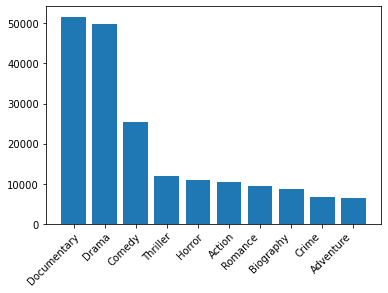

In [87]:
fig, ax = plt.subplots()

x = top10_gen_cnt.index
y = top10_gen_cnt['total_gen_cnt']

ha = ['right', 'center', 'left']

plt.xticks(rotation=45, ha = 'right', rotation_mode = 'anchor')

ax.bar(x,y)

In [33]:
#Top 50 movies by rating with at least 100,000 votes and released no later than 2012
df_top50_rat = df_imdb[(df_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)].sort_values('averagerating', ascending=False)[0:50]

In [34]:
df_top50_rat

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,...,primary_name,birth_year,death_year,primary_profession,year_str,mov_yr_key,Genre_1,Genre_2,Genre_3,rating_relative_to_avg
99483,tt5813916,The Mountain II,Dag II,2016,135.0,"Action,Drama,War",tt5813916,9.3,100568.0,tt5813916,...,Alper Caglar,NaN,NaN,"producer,writer,editor",2016,The Mountain II-2016,Action,Drama,War,2.967271
72821,tt4154796,Avengers: Endgame,Avengers: Endgame,2019,181.0,"Action,Adventure,Sci-Fi",tt4154796,8.8,441135.0,tt4154796,...,Anthony Russo,1970.0,NaN,"producer,director,writer",2019,Avengers: Endgame-2019,Action,Adventure,Sci-Fi,2.467271
311,tt0816692,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi",tt0816692,8.6,1299334.0,tt0816692,...,Christopher Nolan,1970.0,NaN,"writer,producer,director",2014,Interstellar-2014,Adventure,Drama,Sci-Fi,2.267271
43376,tt2582802,Whiplash,Whiplash,2014,106.0,"Drama,Music",tt2582802,8.5,616916.0,tt2582802,...,Damien Chazelle,1985.0,NaN,"producer,writer,director",2014,Whiplash-2014,Drama,Music,None,2.167271
72820,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",tt4154756,8.5,670926.0,tt4154756,...,Anthony Russo,1970.0,NaN,"producer,director,writer",2018,Avengers: Infinity War-2018,Action,Adventure,Sci-Fi,2.167271
87402,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",tt5074352,8.5,123638.0,tt5074352,...,Nitesh Tiwari,NaN,NaN,"writer,director,music_department",2016,Dangal-2016,Action,Biography,Drama,2.167271
80655,tt4633694,Spider-Man: Into the Spider-Verse,Spider-Man: Into the Spider-Verse,2018,117.0,"Action,Adventure,Animation",tt4633694,8.5,210869.0,tt4633694,...,Rodney Rothman,NaN,NaN,"writer,producer,director",2018,Spider-Man: Into the Spider-Verse-2018,Action,Adventure,Animation,2.167271
6900,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller",tt1345836,8.4,1387769.0,tt1345836,...,Christopher Nolan,1970.0,NaN,"writer,producer,director",2012,The Dark Knight Rises-2012,Action,Thriller,None,2.067271
20342,tt1853728,Django Unchained,Django Unchained,2012,165.0,"Drama,Western",tt1853728,8.4,1211405.0,tt1853728,...,Quentin Tarantino,1963.0,NaN,"writer,actor,producer",2012,Django Unchained-2012,Drama,Western,None,2.067271
38424,tt2380307,Coco,Coco,2017,105.0,"Adventure,Animation,Comedy",tt2380307,8.4,277194.0,tt2380307,...,Lee Unkrich,1967.0,NaN,"editorial_department,editor,miscellaneous",2017,Coco-2017,Adventure,Animation,Comedy,2.067271


In [35]:
df_top10_rat = df_top50_rat[0:10]

<ipython-input-86-d6d9bf18798f>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x1, rotation=45, ha = 'right', rotation_mode = 'anchor')
<ipython-input-86-d6d9bf18798f>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(x2, rotation=45, ha = 'right', rotation_mode = 'anchor')


<BarContainer object of 10 artists>

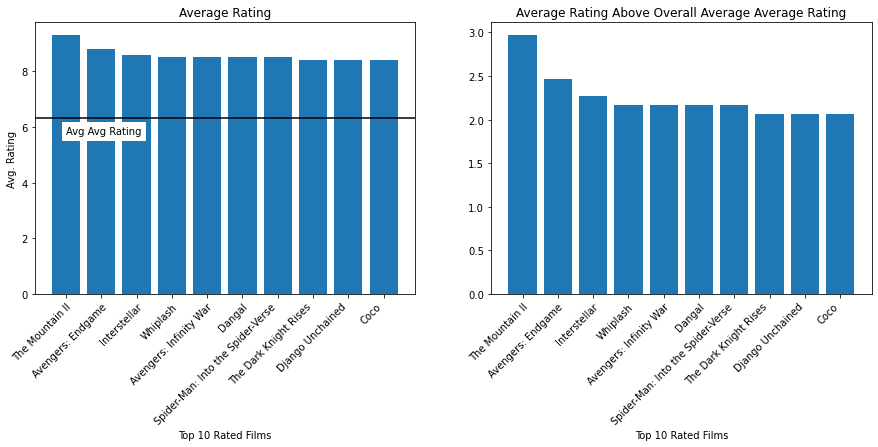

In [86]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_top10_rat['primary_title']
y1 = df_top10_rat['averagerating']

x2 = df_top10_rat['primary_title']
y2 = df_top10_rat['rating_relative_to_avg']

ax1.axhline(6.332729, c="black")
ax1.text(0,5.75,"Avg Avg Rating", backgroundcolor="White")

ha = ['right', 'center', 'left']

ax1.set_xticklabels(x1, rotation=45, ha = 'right', rotation_mode = 'anchor')
ax2.set_xticklabels(x2, rotation=45, ha = 'right', rotation_mode = 'anchor')

ax1.set_xlabel("Top 10 Rated Films")
ax1.set_ylabel("Avg. Rating")

ax2.set_xlabel("Top 10 Rated Films")
ax.set_ylabel("Avg. Rating Above Avg. Avg. Rating")

ax1.set_title("Average Rating")
ax2.set_title("Average Rating Above Overall Average Average Rating")

ax1.bar(x1,y1)
ax2.bar(x2,y2)

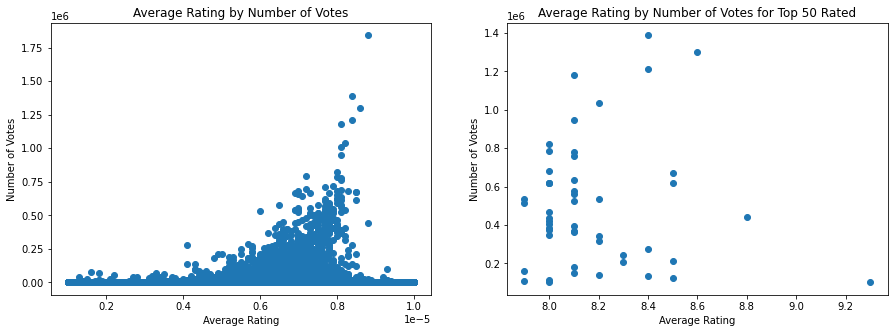

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = (df_imdb['averagerating']/1000000)
y1 = df_imdb['numvotes']

x2 = df_top50_rat['averagerating']
y2 = df_top50_rat['numvotes']


ax1.set_xlabel("Average Rating")
ax1.set_ylabel("Number of Votes")
ax1.set_title("Average Rating by Number of Votes")

ax2.set_xlabel("Average Rating")
ax2.set_ylabel("Number of Votes")
ax2.set_title("Average Rating by Number of Votes for Top 50 Rated")

ax1.scatter(x1,y1)
ax2.scatter(x2,y2)

In [38]:
round(df_imdb['averagerating'].corr(df_imdb['numvotes']), 2)

0.04

In [39]:
df_im_run_noout = df_imdb[df_imdb['runtime_minutes'] < 1000 ]

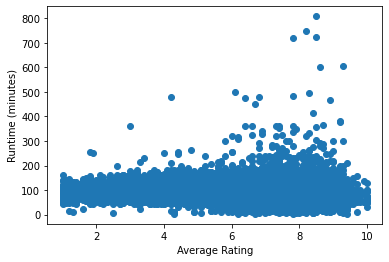

In [40]:
fig, ax = plt.subplots()

x = df_im_run_noout['averagerating']
y = df_im_run_noout['runtime_minutes']

ax.set_xlabel("Average Rating")
ax.set_ylabel("Runtime (minutes)")

ax.scatter(x,y)

In [41]:
dir_mul_top50 = df_top50_rat.value_counts('primary_name')[0:7]


type(dir_mul_top50)

pandas.core.series.Series

In [42]:
df_top50_rat[df_top50_rat['primary_name'] == 'Denis Villeneuve']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,...,primary_name,birth_year,death_year,primary_profession,year_str,mov_yr_key,Genre_1,Genre_2,Genre_3,rating_relative_to_avg
7215,tt1392214,Prisoners,Prisoners,2013,153.0,"Crime,Drama,Mystery",tt1392214,8.1,526273.0,tt1392214,...,Denis Villeneuve,1967.0,NaN,"director,writer,editor",2013,Prisoners-2013,Crime,Drama,Mystery,1.767271
20468,tt1856101,Blade Runner 2049,Blade Runner 2049,2017,164.0,"Drama,Mystery,Sci-Fi",tt1856101,8.0,376241.0,tt1856101,...,Denis Villeneuve,1967.0,NaN,"director,writer,editor",2017,Blade Runner 2049-2017,Drama,Mystery,Sci-Fi,1.667271
42473,tt2543164,Arrival,Arrival,2016,116.0,"Drama,Mystery,Sci-Fi",tt2543164,7.9,515483.0,tt2543164,...,Denis Villeneuve,1967.0,NaN,"director,writer,editor",2016,Arrival-2016,Drama,Mystery,Sci-Fi,1.567271


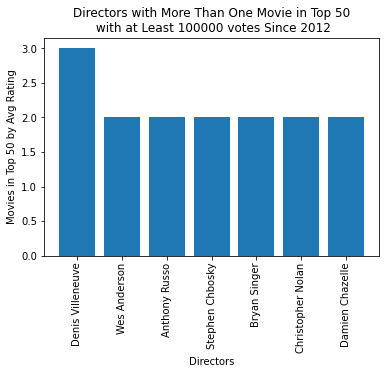

In [43]:
fig, ax = plt.subplots()

x = dir_mul_top50.index
y = dir_mul_top50.values

ax.set_xlabel('Directors')
ax.set_ylabel('Movies in Top 50 by Avg Rating')
ax.set_title('Directors with More Than One Movie in Top 50\n with at Least 100000 votes Since 2012')

plt.xticks(rotation=90)

ax.bar(x,y)

fig.savefig('../images/dirs_top_top_50.png')

# BOM

In [44]:
df_bom = pd.read_csv('../data/bom.movie_gross.csv')

In [45]:
df_bom.sort_values('foreign_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year
1805,Life's a Breeze,Magn.,3500.0,99700,2014
1331,The East,FoxS,2300000.0,99700,2013
302,White Lion,Scre.,NaN,99600,2010
2906,A United Kingdom,FoxS,3900000.0,9900000,2017
510,Le Havre,Jan.,612000.0,9900000,2011
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [46]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(",","")
df_bom['foreign_gross'] = df_bom['foreign_gross'].astype(float)

In [47]:
df_bom['total_gross'] = df_bom['foreign_gross'] + df_bom['domestic_gross']

In [48]:
df_bom.sort_values('foreign_gross')[0:25]

,title,studio,domestic_gross,foreign_gross,year,total_gross
921,Chasing Mavericks,Fox,6000000.0,600.0,2012,6000600.0
721,To Die Like a Man,Strand,4000.0,900.0,2011,4900.0
2760,The Fate of the Furious,Uni.,226000000.0,1010.0,2017,226001010.0
1873,Jurassic World,Uni.,652300000.0,1019.4,2015,652301019.4
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015,936701131.6
1874,Furious 7,Uni.,353000000.0,1163.0,2015,353001163.0
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018,678801369.5
316,The Red Baron,Mont.,37200.0,3100.0,2010,40300.0
290,Client 9: The Rise and Fall of Eliot Spitzer,Magn.,189000.0,3500.0,2010,192500.0
327,Aashayein (Wishes),Relbig.,NaN,3800.0,2010,NaN


In [49]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   float64
 4   year            3387 non-null   int64  
 5   total_gross     2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 158.9+ KB


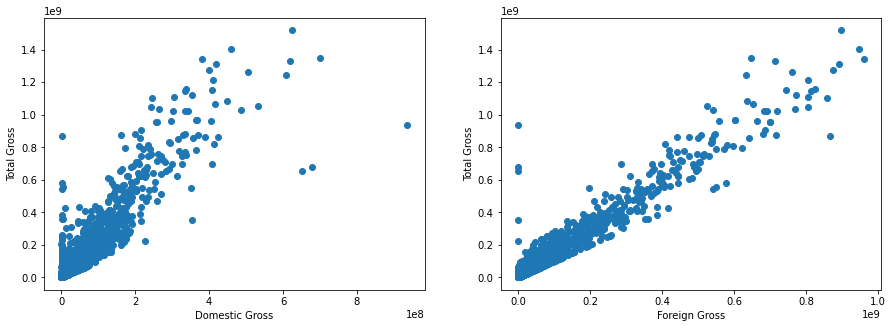

In [50]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_bom['domestic_gross']
y1 = df_bom['total_gross']

x2 = df_bom['foreign_gross']
y2 = df_bom['total_gross']

ax1.set_xlabel("Domestic Gross")
ax1.set_ylabel("Total Gross")

ax2.set_xlabel("Foreign Gross")
ax2.set_ylabel("Total Gross")

ax1.scatter(x1, y1)
ax2.scatter(x2, y2)

In [51]:
df_bom['domestic_gross'].corr(df_bom['total_gross'])

0.9045480373460375

In [52]:
df_bom['foreign_gross'].corr(df_bom['total_gross'])

0.9677590546498869

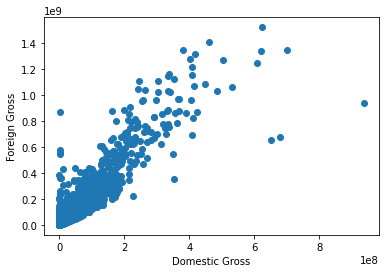

In [53]:
fig, ax = plt.subplots()

x = df_bom['domestic_gross']
y = df_bom['total_gross']

ax.set_xlabel("Domestic Gross")
ax.set_ylabel("Foreign Gross")

ax.scatter(x,y)

Mox Office Movies

In [54]:
df_bom.groupby('studio').sum().sort_values('total_gross', ascending=False)

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.841903e+10,2.579385e+10,213451,4.419038e+10
Fox,1.094950e+10,2.005587e+10,273882,3.098037e+10
WB,1.216805e+10,1.866790e+10,281941,3.079150e+10
Uni.,1.290239e+10,1.685477e+10,296082,2.974681e+10
Sony,8.459683e+09,1.394535e+10,221575,2.240472e+10
...,...,...,...,...
Orion,6.436000e+06,0.000000e+00,4035,0.000000e+00
Cdgm.,1.604000e+06,2.130000e+07,14093,0.000000e+00
CineGalaxy,3.900000e+06,0.000000e+00,2016,0.000000e+00


In [55]:
df_bom_filt = df_bom[df_bom['year'] >= 2012]

In [56]:
df_bom_filt.groupby('studio').sum().sort_values('total_gross', ascending=False)

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.570240e+10,2.117251e+10,157157,3.686251e+10
Fox,8.967700e+09,1.702962e+10,209547,2.597232e+10
Uni.,1.105189e+10,1.457537e+10,235767,2.561691e+10
WB,9.073773e+09,1.416202e+10,209564,2.319382e+10
Sony,6.550983e+09,1.149014e+10,175332,1.804092e+10
...,...,...,...,...
Gaatri,8.980000e+05,0.000000e+00,2016,0.000000e+00
Fathom,1.144700e+07,0.000000e+00,20177,0.000000e+00
FOR,1.020000e+04,0.000000e+00,2015,0.000000e+00


In [57]:
top10_stud_filt = df_bom_filt.groupby('studio').sum().sort_values('total_gross', ascending=False)[:10]
top10_stud_filt

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
BV,1.570240e+10,2.117251e+10,157157,3.686251e+10
Fox,8.967700e+09,1.702962e+10,209547,2.597232e+10
Uni.,1.105189e+10,1.457537e+10,235767,2.561691e+10
WB,9.073773e+09,1.416202e+10,209564,2.319382e+10
Sony,6.550983e+09,1.149014e+10,175332,1.804092e+10
Par.,5.298605e+09,9.049485e+09,159185,1.424340e+10
WB (NL),3.416300e+09,5.567200e+09,72549,8.962900e+09
LGF,3.427902e+09,3.811285e+09,161198,7.106475e+09
LG/S,2.078200e+09,3.353724e+09,82599,5.318924e+09


<BarContainer object of 10 artists>

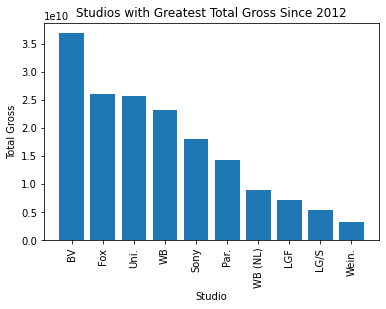

In [58]:
fig, ax = plt.subplots()

x = top10_stud_filt.index
y = top10_stud_filt['total_gross']

ax.set_xlabel("Studio")
ax.set_ylabel("Total Gross")
ax.set_title("Studios with Greatest Total Gross Since 2012")

plt.xticks(rotation=90)

ax.bar(x,y)

In [59]:
stud_top_num_mov = df_bom_filt.value_counts(subset='studio')[:10]
stud_top_num_mov

studio
Uni.     117
IFC      111
Fox      104
WB       104
Magn.     99
SPC       88
Sony      87
LGF       80
Par.      79
BV        78
dtype: int64

<BarContainer object of 10 artists>

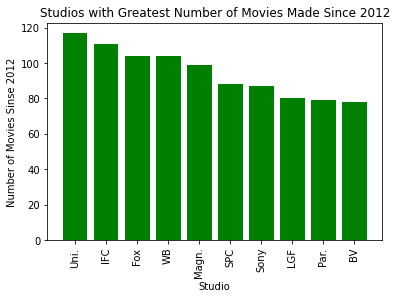

In [60]:
fig, ax = plt.subplots()

x = stud_top_num_mov.index
y = stud_top_num_mov.values

ax.set_xlabel("Studio")
ax.set_ylabel("Number of Movies Sinse 2012")
ax.set_title("Studios with Greatest Number of Movies Made Since 2012")

plt.xticks(rotation=90)

ax.bar(x,y, color="green")

# TN

In [61]:
df_tn = pd.read_csv('../data/tn.movie_budgets.csv')

In [62]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [63]:
df_tn['production_budget'] = df_tn['production_budget'].str.replace(",","")
df_tn['production_budget'] = df_tn['production_budget'].str.replace("$","")

df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace(",","")
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].str.replace("$","")

df_tn['domestic_gross'] = df_tn['worldwide_gross'].str.replace(",","")
df_tn['domestic_gross'] = df_tn['worldwide_gross'].str.replace("$","")

In [64]:
# Convert the data type of the 'release_date' column to a date
df_tn['release_date'] = pd.to_datetime(df_tn['release_date'],format="%b %d, %Y")

# Add a new columns 'year'
df_tn['release_year'] = df_tn['release_date'].dt.year

# Create key column movie + year
df_tn['release_year'] = df_tn['release_year'].astype(str)
df_tn['mov_yr_key'] = df_tn['movie'] + "-" + df_tn['release_year']

In [65]:
df_tn

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,mov_yr_key
0,1,2009-12-18,Avatar,425000000,2776345279,2776345279,2009,Avatar-2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2011,Pirates of the Caribbean: On Stranger Tides-2011
2,3,2019-06-07,Dark Phoenix,350000000,149762350,149762350,2019,Dark Phoenix-2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1403013963,2015,Avengers: Age of Ultron-2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,1316721747,2017,Star Wars Ep. VIII: The Last Jedi-2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018,Red 11-2018
5778,79,1999-04-02,Following,6000,240495,240495,1999,Following-1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,Return to the Land of Wonders-2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015,A Plague So Pleasant-2015


In [66]:
df_tn['worldwide_gross'] = df_tn['worldwide_gross'].astype('int64')
df_tn['production_budget'] = df_tn['production_budget'].astype('int64')
df_tn['domestic_gross'] = df_tn['domestic_gross'].astype('int64')

In [67]:
df_tn_dna = df_tn.dropna(subset=['worldwide_gross'])
df_tn_dna = df_tn_dna.dropna(subset=['production_budget'])

In [68]:
df_tn_dna['worldwide_profit'] = df_tn_dna['worldwide_gross'] - df_tn_dna['production_budget']

# TM IMDB MERGE

In [69]:
df_tn_dna

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,mov_yr_key,worldwide_profit
0,1,2009-12-18,Avatar,425000000,2776345279,2776345279,2009,Avatar-2009,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875,1045663875,2011,Pirates of the Caribbean: On Stranger Tides-2011,635063875
2,3,2019-06-07,Dark Phoenix,350000000,149762350,149762350,2019,Dark Phoenix-2019,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,1403013963,1403013963,2015,Avengers: Age of Ultron-2015,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747,1316721747,2017,Star Wars Ep. VIII: The Last Jedi-2017,999721747
...,...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018,Red 11-2018,-7000
5778,79,1999-04-02,Following,6000,240495,240495,1999,Following-1999,234495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005,Return to the Land of Wonders-2005,-3662
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015,A Plague So Pleasant-2015,-1400


In [70]:
df_tn_imdb = df_tn_dna.merge(df_imdb,how='inner',left_on='mov_yr_key', right_on='mov_yr_key',suffixes=('_tn', '_imdb'))

In [71]:
df_tn_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      1547 non-null   int64         
 1   release_date            1547 non-null   datetime64[ns]
 2   movie                   1547 non-null   object        
 3   production_budget       1547 non-null   int64         
 4   domestic_gross          1547 non-null   int64         
 5   worldwide_gross         1547 non-null   int64         
 6   release_year            1547 non-null   object        
 7   mov_yr_key              1547 non-null   object        
 8   worldwide_profit        1547 non-null   int64         
 9   movie_id                1547 non-null   object        
 10  primary_title           1547 non-null   object        
 11  original_title          1547 non-null   object        
 12  start_year              1547 non-null   int64   

In [72]:
df_tn_imdb['pretty_gens'] = np.NaN

In [73]:
gens_rating = df_tn_imdb.loc[:, ["Genre_1","Genre_2","Genre_3", "averagerating", "numvotes", 'start_year']]

In [74]:
gens_rating_filt = gens_rating[(gens_rating['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]

<ipython-input-74-906ffb2eac56>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gens_rating_filt = gens_rating[(gens_rating['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]


In [75]:
gens_rating_filt = gens_rating_filt.loc[:, ["Genre_1","Genre_2","Genre_3", "averagerating",]]

In [76]:
gens_rating_filt

,Genre_1,Genre_2,Genre_3,averagerating
0,Action,Adventure,Fantasy,6.6
2,Action,Adventure,Sci-Fi,7.3
3,Action,Adventure,Sci-Fi,8.5
4,Action,Adventure,Fantasy,6.5
5,Action,Adventure,Thriller,6.8
...,...,...,...,...
1383,Drama,Mystery,Thriller,7.0
1398,Drama,None,None,7.4
1425,Drama,Romance,None,7.4
1434,Drama,Romance,Sci-Fi,7.4


In [77]:
# average averge ratign where loc cols = action
testt = gens_rating_filt.groupby(['Genre_1', 'Genre_2','Genre_3']).mean().reset_index(inplace=False)

In [78]:
ind = pd.Series(range(0,77))
ind

0      0
1      1
2      2
3      3
4      4
      ..
72    72
73    73
74    74
75    75
76    76
Length: 77, dtype: int64

In [79]:
testt

,Genre_1,Genre_2,Genre_3,averagerating
0,Action,Adventure,Animation,7.385714
1,Action,Adventure,Biography,7.550000
2,Action,Adventure,Comedy,6.842857
3,Action,Adventure,Crime,6.933333
4,Action,Adventure,Drama,6.055556
...,...,...,...,...
72,Drama,Sci-Fi,Thriller,6.950000
73,Fantasy,Horror,Thriller,6.500000
74,Horror,Mystery,Thriller,6.700000
75,Horror,Sci-Fi,Thriller,6.400000


In [80]:
pd.get_dummies(gens_rating_filt)

,averagerating,Genre_1_Action,Genre_1_Adventure,Genre_1_Biography,Genre_1_Comedy,Genre_1_Crime,Genre_1_Drama,Genre_1_Fantasy,Genre_1_Horror,Genre_1_Mystery,...,Genre_3_Horror,Genre_3_Music,Genre_3_Musical,Genre_3_Mystery,Genre_3_Romance,Genre_3_Sci-Fi,Genre_3_Sport,Genre_3_Thriller,Genre_3_War,Genre_3_Western
0,6.6,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,6.5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1383,7.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1398,7.4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1425,7.4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1434,7.4,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
for gen in df_tn_imdb:
    if gen['Genre_3'].notnull() == True:
            gen['pretty_gens'] = df_tn_imdb['Genre_1'] + " - " + df_tn_imdb['Genre_2'] + " - " + df_tn_imdb['Genre_3']
    elif gen['Genre_2'].notnull() == True:
            gen['pretty_gens'] = df_tn_imdb['Genre_1'] + " - " + df_tn_imdb['Genre_2']
    elif gen['Genre_1'].notnull() == True:
            gen['pretty_gens'] = df_tn_imdb['Genre_1']
    else:
        gen['pretty_gens'] = np.NaN

TypeError: string indices must be integers

In [ ]:
df_tn_imdb.sort_values('worldwide_profit', ascending=False)

In [ ]:
df_tn_imdb_filt = df_tn_imdb[(df_tn_imdb['numvotes'] >= 100000) & (df_imdb['start_year'] >= 2012)]

In [ ]:
df_tn_imdb_filt_year = df_tn_imdb[df_imdb['start_year'] >= 2012]

In [ ]:
top10_dirs_profit = df_tn_imdb_filt_year.groupby('primary_name').mean().sort_values('worldwide_profit', ascending=False)[0:10]
top10_dirs_profit

In [ ]:
fig, ax = plt.subplots()

x = top10_dirs_profit.index
y = top10_dirs_profit['worldwide_profit']

ax.set_xlabel("Director")
ax.set_ylabel("Avg Profit per Movie")
ax.set_title("Top 10 Directors by Avg Profit per Movie Since 2012")

plt.xticks(rotation=90)

ax.bar(x,y, color="green")

In [ ]:
fig, ax = plt.subplots()

x = df_tn_imdb_filt['averagerating']
y = df_tn_imdb_filt['worldwide_profit']

ax.set_xlabel("Avg Rating")
ax.set_ylabel("Profit")
ax.set_title("Avg Rating by Profit")



ax.scatter(x,y)

In [ ]:
df_tn_imdb_filt['averagerating'].corr(df_tn_imdb_filt['worldwide_profit'])

In [ ]:
df_tn_imdb_filt['production_budget'].corr(df_tn_imdb_filt['worldwide_profit'])

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

plt.suptitle("Production Budget of Movies Since 2012")

x1 = df_tn_imdb_filt['production_budget']
y1 = df_tn_imdb_filt['averagerating']

x2 = df_tn_imdb_filt['production_budget']
y2 = df_tn_imdb_filt['worldwide_profit']


ax1.set_xlabel("Production Budget")
ax1.set_ylabel("Average Rating")
ax1.set_title("by Average Rating")

ax2.set_xlabel("Production Budget")
ax2.set_ylabel("Worldwide Profit")
ax2.set_title("by Worldwide Profit")

ax1.scatter(x1, y1)
ax2.scatter(x2, y2, color="green")

In [ ]:
df_tn_imdb_filt['production_budget'].corr(df_tn_imdb_filt['averagerating'])

In [ ]:
df_tn_imdb_filt['production_budget'].corr(df_tn_imdb_filt['worldwide_profit'])

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

x1 = df_tn_imdb['production_budget']
y1 = df_tn_imdb['averagerating']

x2 = df_tn_imdb['production_budget']
y2 = df_tn_imdb['worldwide_profit']

ax1.set_xlabel("Production Budget")
ax1.set_ylabel("Average Rating")

ax2.set_xlabel("Production Budget")
ax2.set_ylabel("Worldwide Profit")

ax1.scatter(x1, y1)
ax2.scatter(x2, y2)

In [ ]:
df_tn_imdb['production_budget'].corr(df_tn_imdb['averagerating'])

In [ ]:
df_tn_imdb['production_budget'].corr(df_tn_imdb['worldwide_profit'])

In [ ]:
df_tn_imdb_filt_year_5hunthou = df_tn_imdb_filt_year[df_tn_imdb_filt_year['worldwide_profit'] > 50000000]
df_tn_imdb_filt_year_5hunthou

df_tn_imdb_filt_year_25hunthou = df_tn_imdb_filt_year[df_tn_imdb_filt_year['worldwide_profit'] > 25000000]
df_tn_imdb_filt_year_25hunthou

In [ ]:
df_com_yr_sr_rat = df_tn_imdb_filt_year.sort_values('averagerating', ascending=False)
df_com_yr_sr_rat.info()

In [ ]:
df_tn_imdb_filt_year_5hunthou['production_budget'].mean()

In [ ]:
df_tn_imdb_filt_year_25hunthou['production_budget'].mean()

In [ ]:
top_gen_s_2012 = df_com_yr_sr_rat.loc[:,['genres', 'averagerating', 'worldwide_gross']]
top_gen_s_2012

In [ ]:
top_gen_s_2012['genres'] = top_gen_s_2012['genres'].str.replace(',', ' - ')

In [ ]:
top_gen_s_2012

In [ ]:
top_gen_s_2012.info()

In [ ]:
top_gen_s_2012_grp = top_gen_s_2012.groupby('genres').mean()

In [ ]:
top10_gen_s2012_brat = top_gen_s_2012_grp.sort_values('averagerating', ascending=False)[0:10]
top10_gen_s2012_brat

In [ ]:
top10_gen_s2012_bwrgr = top_gen_s_2012_grp.sort_values('worldwide_gross', ascending=False)[0:10]
top10_gen_s2012_bwrgr

In [ ]:
fig, ax = plt.subplots()

x = top10_gen_s2012_brat.index
y = top10_gen_s2012_brat['averagerating']

ax.set_xlabel("Average Rating")
ax.set_ylabel("Genre Combination")
ax.set_title("Top Genre Combinations by Average Rating Since 2012")

plt.gca().invert_yaxis()

ax.barh(x,y)

In [ ]:
fig, ax = plt.subplots()

x = top10_gen_s2012_bwrgr.index
y = top10_gen_s2012_bwrgr['worldwide_gross']

ax.set_xlabel("Average Worldwide Gross")
ax.set_ylabel("Genre Combination")
ax.set_title("Top Genre Combinations by Worldwide Gross Since 2012")

plt.gca().invert_yaxis()

ax.barh(x,y)

In [ ]:
df_tn_imdb_filt_year.describe()